<a href="https://colab.research.google.com/github/faruq2021/My-ML-MODEL-NOTEBOOKS/blob/main/Markowitz's_Modern_Porfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import cvxpy as cp
import matplotlib.pyplot as plt

# Step 1: Get the historical price data for the stocks
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN"]  # Replace with your own tickers
start_date = "2016-01-01"
end_date = "2021-12-31"

price_data = yf.download(tickers, start=start_date, end=end_date)["Adj Close"]




[*********************100%%**********************]  4 of 4 completed


In [4]:
# Step 2: Calculate the returns of the stocks
returns = price_data.pct_change().dropna()
print(returns)

                AAPL      AMZN     GOOGL      MSFT
Date                                              
2016-01-05 -0.025059 -0.005024  0.002752  0.004562
2016-01-06 -0.019570 -0.001799 -0.002889 -0.018165
2016-01-07 -0.042205 -0.039058 -0.024140 -0.034782
2016-01-08  0.005288 -0.001464 -0.013617  0.003066
2016-01-11  0.016192  0.017610  0.002955 -0.000573
...              ...       ...       ...       ...
2021-12-23  0.003644  0.000184  0.003425  0.004472
2021-12-27  0.022975 -0.008178  0.006738  0.023186
2021-12-28 -0.005767  0.005844 -0.008245 -0.003504
2021-12-29  0.000502 -0.008555 -0.000218  0.002051
2021-12-30 -0.006578 -0.003289 -0.003099 -0.007691

[1509 rows x 4 columns]


In [6]:
# Step 3: Calculate the covariance matrix of the stock returns
cov_matrix = returns.cov()
print(cov_matrix)

           AAPL      AMZN     GOOGL      MSFT
AAPL   0.000343  0.000204  0.000194  0.000222
AMZN   0.000204  0.000343  0.000198  0.000210
GOOGL  0.000194  0.000198  0.000269  0.000214
MSFT   0.000222  0.000210  0.000214  0.000284


In [7]:
# Step 4: Define the optimization problem
num_assets = len(tickers)
weights = cp.Variable(num_assets)
risk = cp.quad_form(weights, cov_matrix.values)
prob = cp.Problem(cp.Minimize(risk),
                  [cp.sum(weights) == 1,
                   weights >= 0])

In [8]:
# Step 5: Solve the optimization problem
prob.solve()

0.00022945476532139713

In [9]:
# Step 6: Get the optimal portfolio weights
optimal_weights = weights.value
print("Optimal weights: ", optimal_weights)

Optimal weights:  [0.18418187 0.19309463 0.40789559 0.21482791]


In [10]:
# Step 7: Calculate portfolio statistics
portfolio_return = np.sum(returns.mean() * optimal_weights) * 252
portfolio_std = np.sqrt(optimal_weights.T.dot(cov_matrix.values).dot(optimal_weights)) * np.sqrt(252)
print("Expected return: ", portfolio_return)
print("Volatility: ", portfolio_std)


Expected return:  0.3138479552285284
Volatility:  0.2404633046038253


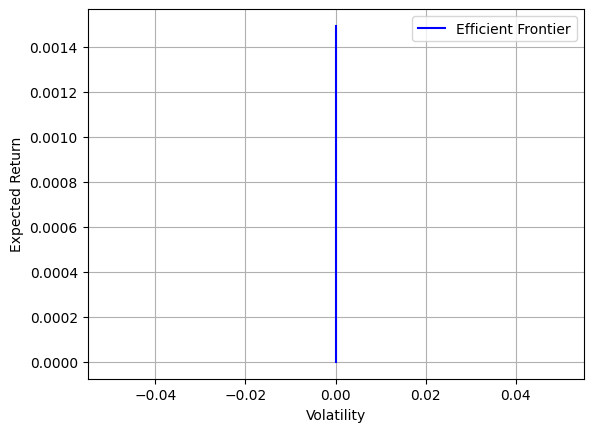

In [23]:
# Step 8: Plot the efficient frontier
# Step 8: Plot the efficient frontier
returns_range = np.linspace(0, returns.mean().max(), 100)
volatility = []
for ret in returns_range:
    prob = cp.Problem(cp.Minimize(risk),
                      [cp.sum(weights) == 1,
                       weights >= 0])
    prob.solve()
    volatility.append(np.sqrt(prob.value))
plt.plot(volatility, returns_range, 'b', label="Efficient Frontier")
plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.legend()
plt.grid()
plt.show()

